In [62]:
import qiskit
import numpy as np # define random numbers
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
#from qiskit.extensions import initialize
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text

# Implement the Constant Oracle

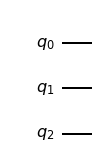

In [63]:
n = 2 # input register length {0,1}
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
const_oracle.draw('mpl')

# Duetsch Jozsa Circuit

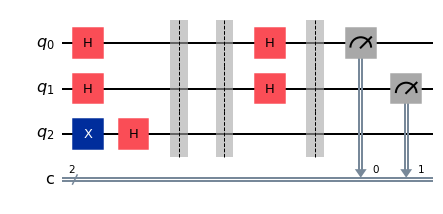

In [64]:
dj_circuit = QuantumCircuit(n+1,n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.barrier()

dj_circuit.compose(const_oracle, inplace = True)
dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i,i)
    
dj_circuit.draw('mpl', style = 'iqx') # IBM style

In [65]:
# if we see X gate in the first run we will see it in the DJ algorithm's circuit too

# QASM simulator


 Total counts are: {'00': 1000}


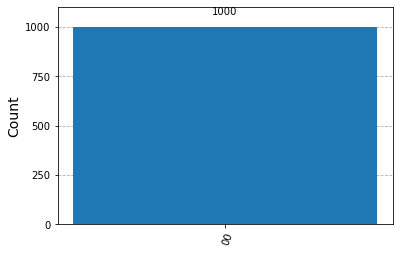

In [66]:
backend = Aer.get_backend('qasm_simulator')

dj_constant = transpile (dj_circuit, backend)

job = backend.run(dj_constant, shots = 1000)

result = job.result()

counts = result.get_counts(dj_circuit)

print("\n Total counts are:", counts)

plot_histogram(counts)

# General function for the constant oracle

In [52]:
def dj_oracle_const(n):
    oracle_qc = QuantumCircuit(n+1)
    output = np.random.randint(2)
    if output == 1:
        oracle_qc.x(n)
        
    oracle_gate_const = oracle_qc.to_gate()
    oracle_gate_const.name = "Oracle Constant"
    return oracle_gate_const

# DJ algorithm function

In [53]:
def dj_algorithm(dj_oracle_const, n):
    dj_circuit = QuantumCircuit(n+1, n)
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    dj_circuit.append(dj_oracle_const, range(n+1))
    
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    for i in range(n):
        dj_circuit.measure(i,i)
        
    return dj_circuit

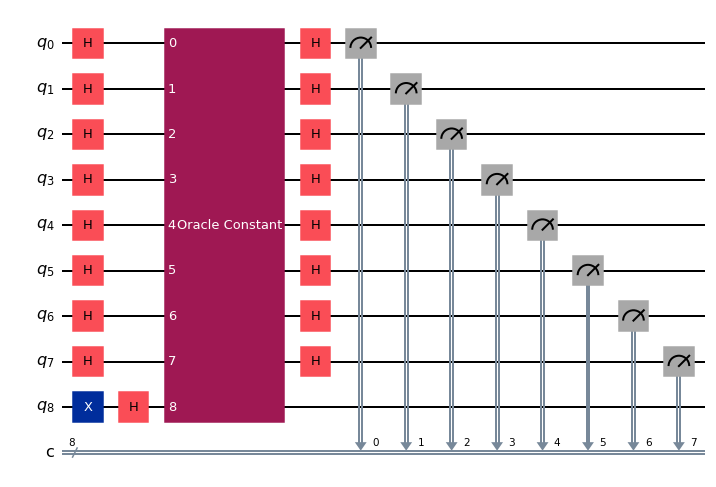

In [54]:
# example
n = 8
oracle_gate_const = dj_oracle_const(n)
dj_circuit = dj_algorithm(oracle_gate_const, n)
dj_circuit.draw('mpl')

# QASM simulator


 Total counts are: {'00000000': 1000}


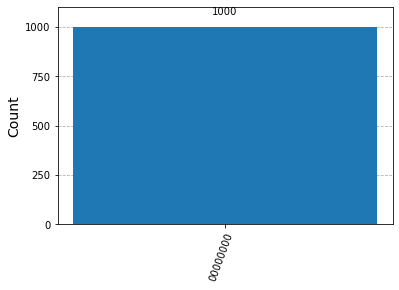

In [55]:
backend = Aer.get_backend('qasm_simulator')

dj_ex = transpile (dj_circuit, backend)

job = backend.run(dj_ex, shots = 1000)

result = job.result()

counts = result.get_counts(dj_circuit)

print("\n Total counts are:", counts)

plot_histogram(counts)

# Implement the Balanced Oracle

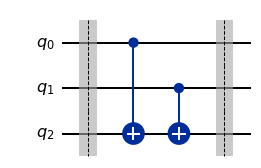

In [68]:
n = 2
balanced_oracle = QuantumCircuit(n+1)
bit_string= "00"

for qubit in range(len(bit_string)):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.barrier()

for qubit in range(n):
    balanced_oracle.cx(qubit, n)
    
balanced_oracle.barrier()

for qubit in range(len(bit_string)):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.draw('mpl')

# Duetsch Jozsa Circuit

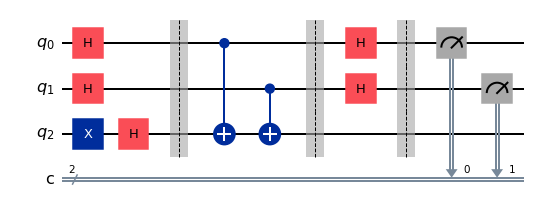

In [69]:
dj_circuit = QuantumCircuit(n+1,n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)
#dj_circuit.barrier()

dj_circuit.compose(balanced_oracle, inplace = True)
#dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i,i)
    
dj_circuit.draw('mpl', style = 'iqx') # IBM style

# QASM simulator


 Total counts are: {'11': 1000}


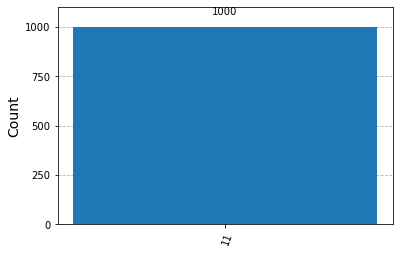

In [70]:
backend = Aer.get_backend('qasm_simulator')

dj_balanced = transpile (dj_circuit, backend)

job = backend.run(dj_balanced, shots = 1000)

result = job.result()

counts = result.get_counts(dj_circuit)

print("\n Total counts are:", counts)

plot_histogram(counts)

In [71]:
# test the same program for bit strings '01', '10', and '11'

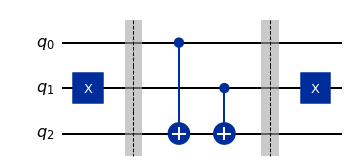

In [73]:
#01
n = 2
balanced_oracle = QuantumCircuit(n+1)
bit_string= "01"

for qubit in range(len(bit_string)):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.barrier()

for qubit in range(n):
    balanced_oracle.cx(qubit, n)
    
balanced_oracle.barrier()

for qubit in range(len(bit_string)):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.draw('mpl')

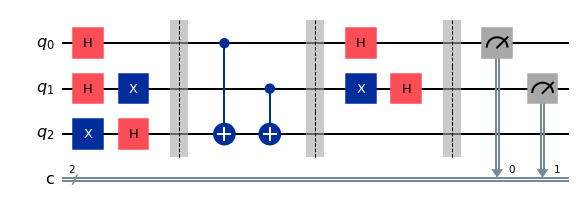

In [74]:
# DJ circuit
dj_circuit = QuantumCircuit(n+1,n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)
#dj_circuit.barrier()

dj_circuit.compose(balanced_oracle, inplace = True)
#dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i,i)
    
dj_circuit.draw('mpl', style = 'iqx') # IBM style


 Total counts are: {'11': 1000}


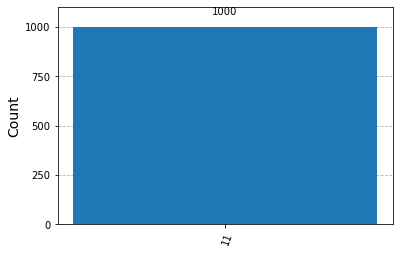

In [75]:
#qasm simulator
backend = Aer.get_backend('qasm_simulator')

dj_balanced = transpile (dj_circuit, backend)

job = backend.run(dj_balanced, shots = 1000)

result = job.result()

counts = result.get_counts(dj_circuit)

print("\n Total counts are:", counts)

plot_histogram(counts)

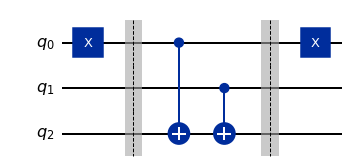

In [76]:
#10
n = 2
balanced_oracle = QuantumCircuit(n+1)
bit_string= "10"

for qubit in range(len(bit_string)):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.barrier()

for qubit in range(n):
    balanced_oracle.cx(qubit, n)
    
balanced_oracle.barrier()

for qubit in range(len(bit_string)):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.draw('mpl')

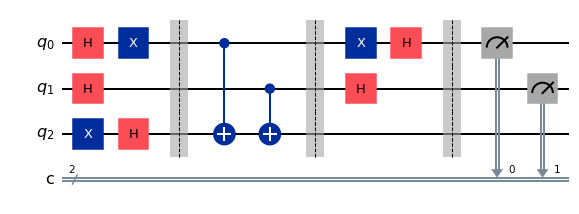

In [77]:
# DJ circuit
dj_circuit = QuantumCircuit(n+1,n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)
#dj_circuit.barrier()

dj_circuit.compose(balanced_oracle, inplace = True)
#dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i,i)
    
dj_circuit.draw('mpl', style = 'iqx') # IBM style


 Total counts are: {'11': 1000}


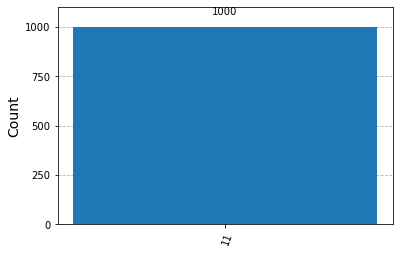

In [78]:
#qasm simulator
backend = Aer.get_backend('qasm_simulator')

dj_balanced = transpile (dj_circuit, backend)

job = backend.run(dj_balanced, shots = 1000)

result = job.result()

counts = result.get_counts(dj_circuit)

print("\n Total counts are:", counts)

plot_histogram(counts)

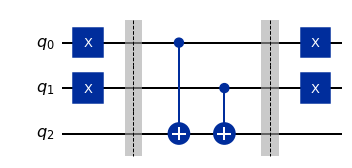

In [79]:
#11
n = 2
balanced_oracle = QuantumCircuit(n+1)
bit_string= "11"

for qubit in range(len(bit_string)):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.barrier()

for qubit in range(n):
    balanced_oracle.cx(qubit, n)
    
balanced_oracle.barrier()

for qubit in range(len(bit_string)):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.draw('mpl')

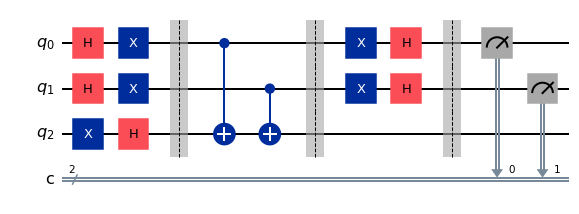

In [80]:
# DJ circuit
dj_circuit = QuantumCircuit(n+1,n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)
#dj_circuit.barrier()

dj_circuit.compose(balanced_oracle, inplace = True)
#dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i,i)
    
dj_circuit.draw('mpl', style = 'iqx') # IBM style


 Total counts are: {'11': 1000}


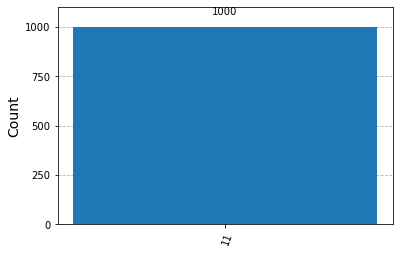

In [81]:
#qasm simulator
backend = Aer.get_backend('qasm_simulator')

dj_balanced = transpile (dj_circuit, backend)

job = backend.run(dj_balanced, shots = 1000)

result = job.result()

counts = result.get_counts(dj_circuit)

print("\n Total counts are:", counts)

plot_histogram(counts)

In [82]:
# we never get 00 bit string

# Genral function for balanced oracle

In [93]:
# test it
b = np.random.randint(1,2**5)
bit_string = format(b, '0'+str(5)+'b') # convert to binary 
bit_string

'11111'

In [94]:
def dj_oracle_balanced(n):
    oracle_qc = QuantumCircuit(n+1)
    b = np.random.randint(1,2**n)
    bit_string = format(b, '0'+str(n)+'b') # convert to binary 
    for qubit in range(len(bit_string)):
        if bit_string[qubit] == '1':
            oracle_qc.x(qubit)
    for qubit in range(n):
        oracle_qc.cx(qubit, n)
        
    for qubit in range(len(bit_string)):
        if bit_string[qubit] == '1':
            oracle_qc.x(qubit)
            
    oracle_gate_balanced = oracle_qc.to_gate()
    oracle_gate_balanced.name = "Oracle Balanced"
    return oracle_gate_balanced
        

In [95]:
# DJ algorithm function

In [96]:
def dj_algorithm(dj_oracle_balanced, n):
    dj_circuit = QuantumCircuit(n+1, n)
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    dj_circuit.append(dj_oracle_balanced, range(n+1))
    
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    for i in range(n):
        dj_circuit.measure(i,i)
        
    return dj_circuit

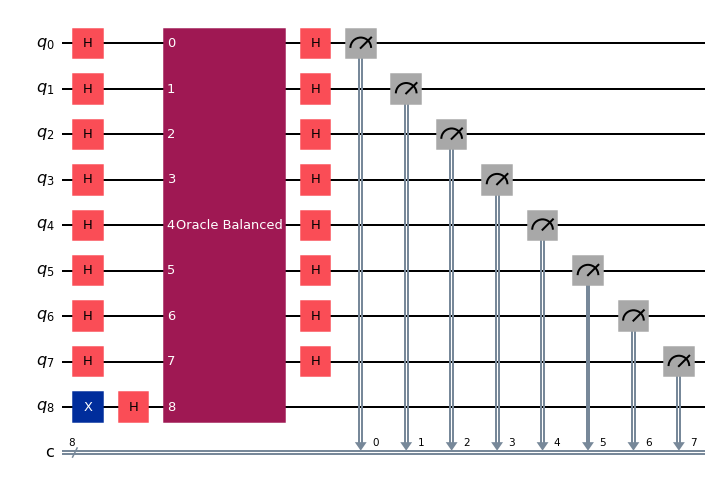

In [97]:
# example
n = 8
oracle_gate_balanced = dj_oracle_balanced(n)
dj_circuit = dj_algorithm(oracle_gate_balanced, n)
dj_circuit.draw('mpl')

# QASM Simulator


 Total counts are: {'11111111': 1000}


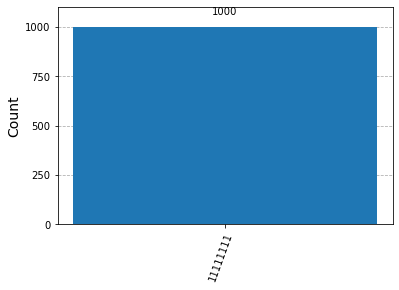

In [98]:
backend = Aer.get_backend('qasm_simulator')

dj_balanced = transpile (dj_circuit, backend)

job = backend.run(dj_balanced, shots = 1000)

result = job.result()

counts = result.get_counts(dj_circuit)

print("\n Total counts are:", counts)

plot_histogram(counts)